# Importing the Dataset

In [200]:
# importing the dataset as a pandas dataframe
import pandas as pd
df = pd.read_csv('task.csv')

print(df.shape)
print(df.columns)
df.head(3)

(80, 14)
Index(['Timestamp', 'Name', 'Year in School', 'Major',
       'Second Major (if applicable)', 'Minor (if applicable)',
       'Second Minor (if applicable)', 'GPA', 'Which team interests you?',
       'Why does this team interest you?',
       'How much time can you commit per week?',
       'What value will you bring to Quant?',
       'What do you hope to get out of Quant?',
       '1 - no, 2 - maybe, 3 - yes, 4 - intern'],
      dtype='object')


,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,How much time can you commit per week?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern"
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4,Quantitative Research,I am interested in both Quant Research and Sof...,"5 to 10 hours per week, but up to 20 depending...",I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4,Software Development,I'm interested in both the Software Developmen...,10-15 hours,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,Software Development,The Software Development team interests me bec...,10-15 hours,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0


# Exploratory Data Analysis and Data Cleaning



In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
df.nunique(axis=0)


Timestamp                                 80
Name                                      79
Year in School                             6
Major                                     36
Second Major (if applicable)               8
Minor (if applicable)                     15
Second Minor (if applicable)               5
GPA                                       38
Which team interests you?                 12
Why does this team interest you?          80
How much time can you commit per week?    63
What value will you bring to Quant?       80
What do you hope to get out of Quant?     80
1 - no, 2 - maybe, 3 - yes, 4 - intern     4
dtype: int64

In [202]:
df.describe()


,"1 - no, 2 - maybe, 3 - yes, 4 - intern"
count,60.000000
mean,2.583333
std,0.787437
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


In [203]:
df = df[df['1 - no, 2 - maybe, 3 - yes, 4 - intern'].notna()]

only one column is numeric data, so we must convert the others as necessary

## GPA Column

In [204]:
# convert gpa column to floats


df['GPA'] = pd.to_numeric(df['GPA'],errors = 'coerce')

df2 = df.dropna(subset=['GPA'])
print((abs(len(df2)-len(df)))/len(df)*100) # percentage of missing values in dataset, 




20.0


In [205]:
df.corr()

,GPA,"1 - no, 2 - maybe, 3 - yes, 4 - intern"
GPA,1.000000,0.553592
"1 - no, 2 - maybe, 3 - yes, 4 - intern",0.553592,1.000000


Since 18.75% is a reasonable margin for error we can perform some sort of imputation to the NaN values. 


In [206]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imp = imp.fit(df[['GPA']])
df['GPA'] = imp.transform(df[['GPA']]).ravel()
df2 = df.dropna(subset= ['GPA'])
print((abs(len(df2)-len(df)))/len(df)*100) # percentage of missing values in dataset, 
# Goal is to check that all nan values have been replaced by the mean value in the datset. 


0.0


Note: Another possible way to do imputation is K-nearest neighbours but it seems more intuitive to use only the gpa column's data for imputation as we don't have any variables that are clearly correlated with GPA. 

## Hours Available

In [207]:
df['hours']  = df['How much time can you commit per week?'] #making column easier to work with having such a wordy name is annoying
df = df.assign(hours = lambda x: x['hours'].str.extract('(\d+)')) # using regex to scrape out first number from the range/ single number each person gave. 
print(df['hours'])


0       5
1      10
2      10
3      10
4       3
5       8
6       6
7       8
8       5
9       5
10     10
11     30
12      5
13      5
14      4
15      5
16      5
17     10
18      5
19     10
20     12
21      5
22      4
23      5
24     15
25      5
26      5
27     24
28    NaN
29      5
30      7
31     10
32      5
33      5
34     15
35     10
36      4
37      3
38     10
39      4
41     10
42     10
43      5
44     20
45      4
46      5
47      5
48      4
49     40
50      5
51     20
52      5
53    NaN
54      7
55     10
56      5
57      8
58      5
59      4
60      5
Name: hours, dtype: object


In [208]:
# since dtype is still object, we should convert it to numerical data again for ease of use. 
df['hours'] = pd.to_numeric(df['hours'],errors = 'coerce')
df['hours']


0      5.0
1     10.0
2     10.0
3     10.0
4      3.0
5      8.0
6      6.0
7      8.0
8      5.0
9      5.0
10    10.0
11    30.0
12     5.0
13     5.0
14     4.0
15     5.0
16     5.0
17    10.0
18     5.0
19    10.0
20    12.0
21     5.0
22     4.0
23     5.0
24    15.0
25     5.0
26     5.0
27    24.0
28     NaN
29     5.0
30     7.0
31    10.0
32     5.0
33     5.0
34    15.0
35    10.0
36     4.0
37     3.0
38    10.0
39     4.0
41    10.0
42    10.0
43     5.0
44    20.0
45     4.0
46     5.0
47     5.0
48     4.0
49    40.0
50     5.0
51    20.0
52     5.0
53     NaN
54     7.0
55    10.0
56     5.0
57     8.0
58     5.0
59     4.0
60     5.0
Name: hours, dtype: float64

In [209]:
df2 = df.dropna(subset=['hours'])
print((abs(len(df2)-len(df)))/len(df)*100) # percent of hours values that are na. 

3.3333333333333335


As we can see only 3.75% of the values for the hours are NaN, therefore the column is very usable and should probably be imputed.

In [210]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imp = imp.fit(df[['hours']])
df['hours'] = imp.transform(df[['hours']]).ravel()
df2 = df.dropna(subset= ['hours'])
print((abs(len(df2)-len(df)))/len(df)*100) # percentage of missing values in dataset, 
# Goal is to check that all nan values have been replaced by the mean value in the datset. 

0.0


Above code is very similar to the procedure for the gpa dataset, replaced all NaN values with the average GPA in the dataset.

In [211]:
df.drop(columns = ['How much time can you commit per week?']) # irrelevant now that we have the hours column

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.000,Quantitative Research,I am interested in both Quant Research and Sof...,I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.000000
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.000,Software Development,I'm interested in both the Software Developmen...,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.000000
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.910,Software Development,The Software Development team interests me bec...,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.000000
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.740,"Software Development, Strategy Implementation,...",Interested in drawing insights from markets.,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.000000
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.920,Quantitative Research,I want to pursue a career in the field of quan...,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.000000
5,12/2/2021 21:25:37,Clayton Wilson,Freshman,Electrical and Computer Engineering,NaN,NaN,NaN,3.815,Quantitative Research,Being a part of the Quantitative Research team...,I'm an extremely driven person and possess gre...,I hope to strengthen my foundations of descrip...,2.0,8.000000
6,12/2/2021 22:09:00,John Hanna,Freshman,Computer Science,NaN,Mathematics,NaN,3.815,Software Development,I know that other than algorithm / statistic s...,I hope to bring my relevant experience to Quan...,"So far, I have only been working on small scal...",4.0,6.000000
7,12/3/2021 11:40:08,Joshua Owens,Junior,Computer Science,NaN,NaN,NaN,3.930,Strategy Implementation,I am very interested in the intersection of da...,I have built up vast experience in the softwar...,I hope to be a part of a community that is int...,3.0,8.000000
8,12/4/2021 15:57:13,Ann Riley,Freshman,Computer Science + Linguistics,NaN,NaN,NaN,4.000,Software Development,"I've delved in many areas in computer science,...",I will bring my experience from my past intern...,"As said earlier, I love to learn new things, a...",3.0,5.000000
9,12/5/2021 12:27:58,Justin Newman,Senior,Computer Science,Mathematics,NaN,NaN,3.800,Quantitative Research,I worked at the D E Shaw Group last summer and...,"Analytics, algorithm, and machine learning kno...",Practice,3.0,5.000000


In [212]:
df.corr()

,GPA,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours
GPA,1.000000,0.516235,-0.204425
"1 - no, 2 - maybe, 3 - yes, 4 - intern",0.516235,1.000000,0.022063
hours,-0.204425,0.022063,1.000000


Now that we've handled most of our numerical data and can see that there is some correlation between the GPA and the score of the candidate, we'll try and analyze some of the text based data. 


### Text Based Data

In [213]:
df['word count'] = (df['Why does this team interest you?'] + df['What value will you bring to Quant?'] + df['What do you hope to get out of Quant?']).apply(lambda x: len(str(x).split(" ")))
df.head()

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,How much time can you commit per week?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,Quantitative Research,I am interested in both Quant Research and Sof...,"5 to 10 hours per week, but up to 20 depending...",I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.0,122
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,Software Development,I'm interested in both the Software Developmen...,10-15 hours,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.0,166
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,Software Development,The Software Development team interests me bec...,10-15 hours,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.0,241
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"Software Development, Strategy Implementation,...",Interested in drawing insights from markets.,10 hours,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.0,46
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,Quantitative Research,I want to pursue a career in the field of quan...,3–5 hours,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.0,68


In [214]:
df.corr()

,GPA,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count
GPA,1.000000,0.516235,-0.204425,0.007578
"1 - no, 2 - maybe, 3 - yes, 4 - intern",0.516235,1.000000,0.022063,0.339824
hours,-0.204425,0.022063,1.000000,-0.128770
word count,0.007578,0.339824,-0.128770,1.000000


In [215]:
df['char count'] = (df['Why does this team interest you?'] + df['What value will you bring to Quant?'] + df['What do you hope to get out of Quant?']).str.len()
df.head()

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,How much time can you commit per week?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,Quantitative Research,I am interested in both Quant Research and Sof...,"5 to 10 hours per week, but up to 20 depending...",I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.0,122,790
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,Software Development,I'm interested in both the Software Developmen...,10-15 hours,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.0,166,1081
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,Software Development,The Software Development team interests me bec...,10-15 hours,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.0,241,1460
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"Software Development, Strategy Implementation,...",Interested in drawing insights from markets.,10 hours,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.0,46,303
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,Quantitative Research,I want to pursue a career in the field of quan...,3–5 hours,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.0,68,384


In [216]:
df.corr()

,GPA,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count
GPA,1.000000,0.516235,-0.204425,0.007578,0.006697
"1 - no, 2 - maybe, 3 - yes, 4 - intern",0.516235,1.000000,0.022063,0.339824,0.335874
hours,-0.204425,0.022063,1.000000,-0.128770,-0.125435
word count,0.007578,0.339824,-0.128770,1.000000,0.995560
char count,0.006697,0.335874,-0.125435,0.995560,1.000000


In [217]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['avg_word'] = (df['Why does this team interest you?'] + df['What value will you bring to Quant?'] + df['What do you hope to get out of Quant?']).apply(lambda x: avg_word(x))
df.head()

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,How much time can you commit per week?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count,avg_word
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,Quantitative Research,I am interested in both Quant Research and Sof...,"5 to 10 hours per week, but up to 20 depending...",I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.0,122,790,5.483607
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,Software Development,I'm interested in both the Software Developmen...,10-15 hours,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.0,166,1081,5.518072
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,Software Development,The Software Development team interests me bec...,10-15 hours,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.0,241,1460,5.062241
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"Software Development, Strategy Implementation,...",Interested in drawing insights from markets.,10 hours,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.0,46,303,5.608696
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,Quantitative Research,I want to pursue a career in the field of quan...,3–5 hours,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.0,68,384,4.661765


In [218]:
df.corr()

,GPA,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count,avg_word
GPA,1.000000,0.516235,-0.204425,0.007578,0.006697,-0.002339
"1 - no, 2 - maybe, 3 - yes, 4 - intern",0.516235,1.000000,0.022063,0.339824,0.335874,-0.141008
hours,-0.204425,0.022063,1.000000,-0.128770,-0.125435,0.027041
word count,0.007578,0.339824,-0.128770,1.000000,0.995560,-0.104551
char count,0.006697,0.335874,-0.125435,0.995560,1.000000,-0.031271
avg_word,-0.002339,-0.141008,0.027041,-0.104551,-0.031271,1.000000


In [219]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = (df['Why does this team interest you?'] + df['What value will you bring to Quant?'] + df['What do you hope to get out of Quant?']).apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,How much time can you commit per week?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count,avg_word,stopwords
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,Quantitative Research,I am interested in both Quant Research and Sof...,"5 to 10 hours per week, but up to 20 depending...",I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.0,122,790,5.483607,48
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,Software Development,I'm interested in both the Software Developmen...,10-15 hours,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.0,166,1081,5.518072,68
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,Software Development,The Software Development team interests me bec...,10-15 hours,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.0,241,1460,5.062241,104
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"Software Development, Strategy Implementation,...",Interested in drawing insights from markets.,10 hours,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.0,46,303,5.608696,18
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,Quantitative Research,I want to pursue a career in the field of quan...,3–5 hours,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.0,68,384,4.661765,28


In [220]:
df.corr()

,GPA,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count,avg_word,stopwords
GPA,1.000000,0.516235,-0.204425,0.007578,0.006697,-0.002339,0.003189
"1 - no, 2 - maybe, 3 - yes, 4 - intern",0.516235,1.000000,0.022063,0.339824,0.335874,-0.141008,0.324417
hours,-0.204425,0.022063,1.000000,-0.128770,-0.125435,0.027041,-0.131991
word count,0.007578,0.339824,-0.128770,1.000000,0.995560,-0.104551,0.993384
char count,0.006697,0.335874,-0.125435,0.995560,1.000000,-0.031271,0.983730
avg_word,-0.002339,-0.141008,0.027041,-0.104551,-0.031271,1.000000,-0.151469
stopwords,0.003189,0.324417,-0.131991,0.993384,0.983730,-0.151469,1.000000


In [221]:
df['Which team interests you?'] = df['Which team interests you?'].str.split(", ")

In [222]:
def job_type(value):
    l = []
    if 'Quantitative Research' in value:
        l.append(1)
    if 'Software Development' in value:
        l.append(2)
    if 'Strategy Implementation' in value:
        l.append(3)
    if 'Business' in value:
        l.append(4)
    return l


df['team numbers'] = (df['Which team interests you?']).apply(lambda x: job_type(x))
df.head()


,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,How much time can you commit per week?,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count,avg_word,stopwords,team numbers
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,[Quantitative Research],I am interested in both Quant Research and Sof...,"5 to 10 hours per week, but up to 20 depending...",I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.0,122,790,5.483607,48,[1]
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,[Software Development],I'm interested in both the Software Developmen...,10-15 hours,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.0,166,1081,5.518072,68,[2]
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,[Software Development],The Software Development team interests me bec...,10-15 hours,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.0,241,1460,5.062241,104,[2]
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"[Software Development, Strategy Implementation...",Interested in drawing insights from markets.,10 hours,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.0,46,303,5.608696,18,"[1, 2, 3]"
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,[Quantitative Research],I want to pursue a career in the field of quan...,3–5 hours,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.0,68,384,4.661765,28,[1]


In [223]:
def class_type(value):
    if value == 'Freshman':
        return 1
    if value == 'Sophomore':
        return 2
    if value == 'Junior':
        return 3
    if value == 'Senior':
        return 4
    return 0
df['class value'] = df['Year in School'].apply(lambda x: class_type(x))
df.head()

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,...,What value will you bring to Quant?,What do you hope to get out of Quant?,"1 - no, 2 - maybe, 3 - yes, 4 - intern",hours,word count,char count,avg_word,stopwords,team numbers,class value
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,[Quantitative Research],I am interested in both Quant Research and Sof...,...,I have extensive experience working on enginee...,It is extremely difficult to learn about quant...,3.0,5.0,122,790,5.483607,48,[1],1
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,[Software Development],I'm interested in both the Software Developmen...,...,The main value I'd bring to quant would be fro...,I'm hoping to gain more experience with quanti...,3.0,10.0,166,1081,5.518072,68,[2],1
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,[Software Development],The Software Development team interests me bec...,...,Aside from taking most of the core CS classes ...,I'd like to learn more about system programmin...,4.0,10.0,241,1460,5.062241,104,[2],2
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"[Software Development, Strategy Implementation...",Interested in drawing insights from markets.,...,My technical skills and background will allow ...,"Learn new skills and most of all, develop a ne...",1.0,10.0,46,303,5.608696,18,"[1, 2, 3]",3
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,[Quantitative Research],I want to pursue a career in the field of quan...,...,I believe my knowledge in the field of Statist...,Some project experience and collaboration skills.,2.0,3.0,68,384,4.661765,28,[1],3


In [224]:
# to make stuff easier to wrok with in the last column
df['score'] = df['1 - no, 2 - maybe, 3 - yes, 4 - intern']

df = df.drop(['1 - no, 2 - maybe, 3 - yes, 4 - intern'], axis = 1)

In [225]:
df.corr()

,GPA,hours,word count,char count,avg_word,stopwords,class value,score
GPA,1.000000,-0.204425,0.007578,0.006697,-0.002339,0.003189,-0.030492,0.516235
hours,-0.204425,1.000000,-0.128770,-0.125435,0.027041,-0.131991,-0.299224,0.022063
word count,0.007578,-0.128770,1.000000,0.995560,-0.104551,0.993384,-0.203858,0.339824
char count,0.006697,-0.125435,0.995560,1.000000,-0.031271,0.983730,-0.216062,0.335874
avg_word,-0.002339,0.027041,-0.104551,-0.031271,1.000000,-0.151469,-0.051672,-0.141008
stopwords,0.003189,-0.131991,0.993384,0.983730,-0.151469,1.000000,-0.186471,0.324417
class value,-0.030492,-0.299224,-0.203858,-0.216062,-0.051672,-0.186471,1.000000,-0.169477
score,0.516235,0.022063,0.339824,0.335874,-0.141008,0.324417,-0.169477,1.000000


In [226]:
import re
import operator
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def create_word_cloud(jd):
    corpus = jd
    fdist = FreqDist(corpus)
     #print(fdist.most_common(100))
    words = ' '.join(corpus)
    words = words.split()
     
     # create a empty dictionary  
    data = dict() 
    #  Get frequency for each words where word is the key and the count is the value  
    for word in (words):     
        word = word.lower()     
        data[word] = data.get(word, 0) + 1 
    # Sort the dictionary in reverse order to print first the most used terms
    dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True)) 
    word_cloud = WordCloud(width = 800, height = 800, 
    background_color ='white',max_words = 500) 
    word_cloud.generate_from_frequencies(data) 
    
    # plot the WordCloud image
    plt.figure(figsize = (10, 8), edgecolor = 'k')
    plt.imshow(word_cloud,interpolation = 'bilinear')  
    plt.axis("off")  
    plt.tight_layout(pad = 0)
    plt.show()
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    #print("\nSimilarity Scores:")
     
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
    
    #print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")
    return matchPercentage
def clean_job_decsription(jd):
     ''' a function to create a word cloud based on the input text parameter'''
     ## Clean the Text
     # Lower
     clean_jd = jd.lower()
     # remove punctuation
     clean_jd = re.sub(r'[^\w\s]', '', clean_jd)
     # remove trailing spaces
     clean_jd = clean_jd.strip()
     # remove numbers
     clean_jd = re.sub('[0-9]+', '', clean_jd)
     # tokenize 
     clean_jd = word_tokenize(clean_jd)
     # remove stop words
     stop = stopwords.words('english')
     clean_jd = [w for w in clean_jd if not w in stop] 
     return(clean_jd)

In [227]:
df.columns

Index(['Timestamp', 'Name', 'Year in School', 'Major',
       'Second Major (if applicable)', 'Minor (if applicable)',
       'Second Minor (if applicable)', 'GPA', 'Which team interests you?',
       'Why does this team interest you?',
       'How much time can you commit per week?',
       'What value will you bring to Quant?',
       'What do you hope to get out of Quant?', 'hours', 'word count',
       'char count', 'avg_word', 'stopwords', 'team numbers', 'class value',
       'score'],
      dtype='object')

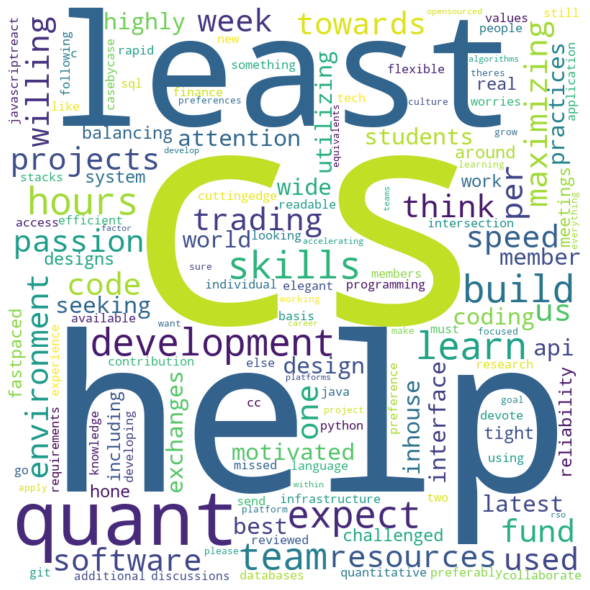

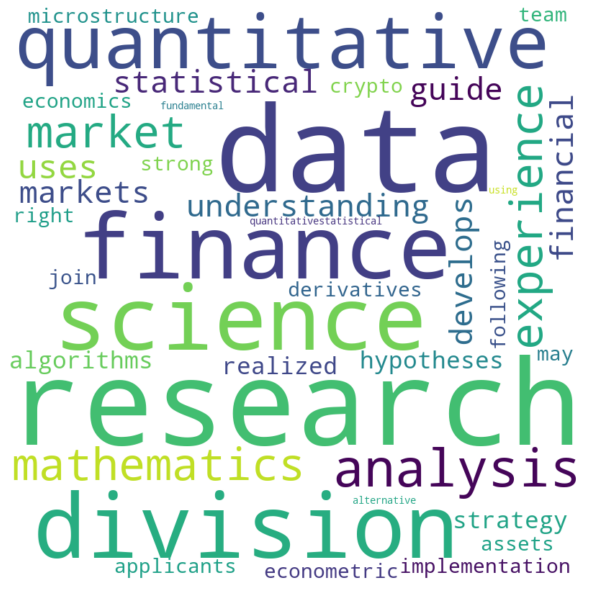

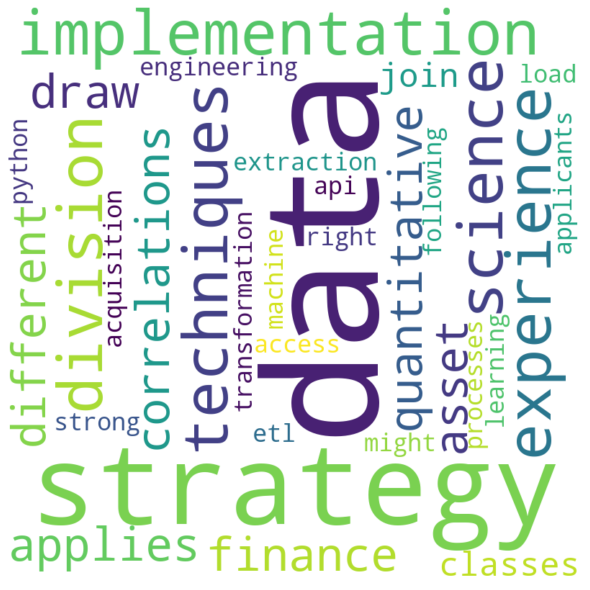

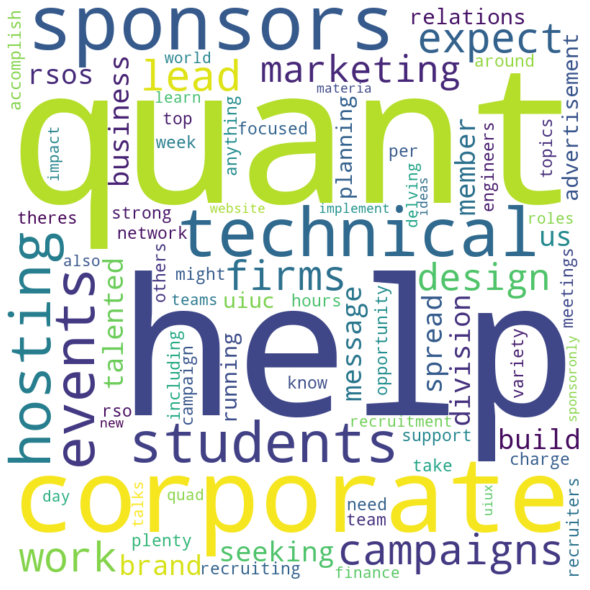

,Timestamp,Name,Year in School,Major,Second Major (if applicable),Minor (if applicable),Second Minor (if applicable),GPA,Which team interests you?,Why does this team interest you?,...,avg_word,stopwords,team numbers,class value,score,combined text answers,swe_score,qr_score,si_score,business_score
0,12/2/2021 17:41:15,Jessica Smith,Freshman,Computer Science,Mathematics,Urban Planning,NaN,4.00,[Quantitative Research],I am interested in both Quant Research and Sof...,...,5.483607,48,[1],1,3.0,It is extremely difficult to learn about quant...,27,27,11,7
1,12/2/2021 17:51:17,Teresa Aguilar,Freshman,Computer Science,NaN,Mathematics,NaN,4.00,[Software Development],I'm interested in both the Software Developmen...,...,5.518072,68,[2],1,3.0,I'm hoping to gain more experience with quanti...,26,36,14,16
2,12/2/2021 18:00:50,Angela Miranda,Sophomore,Mathematics & Computer Science,NaN,NaN,NaN,3.91,[Software Development],The Software Development team interests me bec...,...,5.062241,104,[2],2,4.0,I'd like to learn more about system programmin...,36,25,17,18
3,12/2/2021 19:00:07,Andre Mccormick,Junior,Statistics & Computer Science,NaN,Mathematics,NaN,3.74,"[Software Development, Strategy Implementation...",Interested in drawing insights from markets.,...,5.608696,18,"[1, 2, 3]",3,1.0,"Learn new skills and most of all, develop a ne...",19,10,4,15
4,12/2/2021 21:23:32,Marcus Gilbert,Junior,Statistics,NaN,NaN,NaN,3.92,[Quantitative Research],I want to pursue a career in the field of quan...,...,4.661765,28,[1],3,2.0,Some project experience and collaboration skil...,17,12,12,7


In [239]:
df['combined text answers'] = df['What do you hope to get out of Quant?'] + df['What value will you bring to Quant?']+ df['Why does this team interest you?']
swe_jd = "At Quant, we are seeking highly motivated students with a passion for code, speed, and an attention to coding best practices. As a member of the Software Development team, you will be utilizing the latest resources to help us design our in-house API and interface with exchanges world wide. You can expect to be challenged by balancing system designs with speed and reliability. We expect around at least 3-4 hours of work per week including team meetings. What to expect: Hone your skills in Software Development in an environment as tight and fast-paced as a real Quantitative Trading Fund Flexible projects that help build your skills and an environment that values individual contribution while maximizing for what you like to do Access to the cutting-edge of quant resources only available to members of Quant Learn about the intersection between research, trading infrastructure, and finance Requirements:  Knowledge of at least one programming language, preferably two or more. One must be from the following: C/C++, Java, Python, JavaScript/React, C#, Go, SQL and databases, … Think I missed something? No worries! Still send in your application and it will be reviewed on a case-by-case basis… we’re looking for people who are willing to learn above all else! Can devote at least 3-4 hours per week, with preference towards at least 4+ hours A passion for developing efficient, readable, and elegant code Experience with rapid development and using Git Willing to learn about new tech stacks and collaborate in team discussions Additional Preferences: CS 128, CS 225, CS 411, CS 357, CS 374, CS 233, and equivalents Our culture is focused on maximizing learning, and everything we do is towards this goal. If you think there’s a project we should be working on, please apply and help us grow our platform! We want to make sure the skills and projects you build will be an accelerating factor in your career. The platforms we build will be open-sourced and used within our RSO to help other teams develop the algorithms used in our fund. "
qr_jd = "The Quantitative Research division uses their understanding of finance, data science, statistical analysis, and mathematics to guide research on financial markets. The division develops hypotheses (algorithms) that are realized by the strategy implementation team. How to Join If you have experience with finance research, data science, or mathematics research, the Quantitative Research division may be right for you. Strong applicants will have experience in the following: Finance, economics, or econometric research Market microstructure, derivatives, or crypto assets Quantitative/statistical analysis using fundamental data, market data, or alternative data Data science"
si_jd = "The strategy implementation division applies data science techniques to quantitative finance as they draw correlations between different asset classes How to Join If you have experience in data engineering or data science, the strategy implementation division might be right for you. Strong applicants will have experience in the following: Data extraction, transformation, and load (ETL) processes Data acquisition through API access Python Machine learning techniques"
business_jd = "At Quant, we are seeking talented students to help spread our RSO’s brand and message. As a member of the business division you will help us build our relations with our corporate sponsors, planning and hosting events for students at UIUC, and running advertisement and recruiting campaigns to help others know more about what we do! There’s plenty of opportunity for you to take charge and lead your own campaigns, all with the support of a strong technical RSO to accomplish anything technical you might need. We expect around 3-4 hours of work per week including team meetings. What to expect: Network with corporate sponsors, recruiters, and engineers at top quant firms Lead your very own marketing campaign focused on a variety of topics from recruitment to events to Quad Day! Learn about the impact marketing roles have on Quant firms, while also delving into the world of finance through hosting talks with our corporate sponsors! Work with our technical teams to implement new ideas on website design, UI/UX design, and sponsor-only materia"
clean_swe = clean_job_decsription(swe_jd)
create_word_cloud(clean_swe)
clean_qr = clean_job_decsription(qr_jd)
create_word_cloud(clean_qr)
clean_si = clean_job_decsription(si_jd)
create_word_cloud(clean_si)
clean_business = clean_job_decsription(business_jd)
create_word_cloud(clean_business)

df['swe_score'] = 0
df['qr_score'] = 0
df['si_score'] = 0
df['business_score'] = 0
for index, row in df.iterrows():
    
    df.at[index, 'swe_score'] = get_resume_score([row['combined text answers'], swe_jd])
    df.at[index, 'qr_score'] = get_resume_score([row['combined text answers'], qr_jd])
    df.at[index, 'si_score'] = get_resume_score([row['combined text answers'], si_jd])
    df.at[index, 'business_score'] = get_resume_score([row['combined text answers'], business_jd])
#df['clean_qr_jd']= clean_job_decsription(qr_jd)
#df['clean_si_jd'] = clean_job_decsription(si_jd)
#df['clean_business_jd'] = clean_job_decsription(business_jd)
df.head()
#df['swe_score'] = df.apply(lambda x: get_resume_score(df['combined text answers'], df['clean_swe_jd']))

In [240]:
df.corr()

,GPA,hours,word count,char count,avg_word,stopwords,class value,score,swe_score,qr_score,si_score,business_score
GPA,1.000000,-0.204425,0.007578,0.006697,-0.002339,0.003189,-0.030492,0.516235,0.191602,-0.268976,-0.268117,0.175767
hours,-0.204425,1.000000,-0.128770,-0.125435,0.027041,-0.131991,-0.299224,0.022063,-0.091209,0.079494,-0.023072,-0.189771
word count,0.007578,-0.128770,1.000000,0.995560,-0.104551,0.993384,-0.203858,0.339824,0.437801,0.153846,0.131388,0.377241
char count,0.006697,-0.125435,0.995560,1.000000,-0.031271,0.983730,-0.216062,0.335874,0.426658,0.186589,0.144372,0.365062
avg_word,-0.002339,0.027041,-0.104551,-0.031271,1.000000,-0.151469,-0.051672,-0.141008,-0.150571,0.295366,0.102462,-0.216306
stopwords,0.003189,-0.131991,0.993384,0.983730,-0.151469,1.000000,-0.186471,0.324417,0.435725,0.153960,0.138773,0.393326
class value,-0.030492,-0.299224,-0.203858,-0.216062,-0.051672,-0.186471,1.000000,-0.169477,-0.068277,-0.311259,-0.084095,-0.071126
score,0.516235,0.022063,0.339824,0.335874,-0.141008,0.324417,-0.169477,1.000000,0.359483,-0.105019,-0.131396,0.225738
swe_score,0.191602,-0.091209,0.437801,0.426658,-0.150571,0.435725,-0.068277,0.359483,1.000000,-0.180328,-0.151080,0.686556
qr_score,-0.268976,0.079494,0.153846,0.186589,0.295366,0.153960,-0.311259,-0.105019,-0.180328,1.000000,0.795440,-0.263331


## Graphs

<AxesSubplot:>

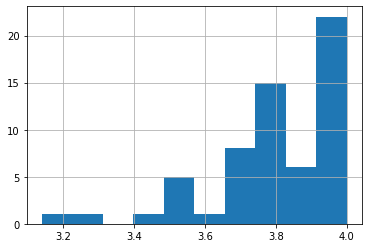

In [229]:
df['GPA'].hist()

<AxesSubplot:>

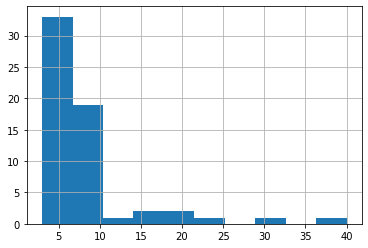

In [230]:
df['hours'].hist()

<AxesSubplot:>

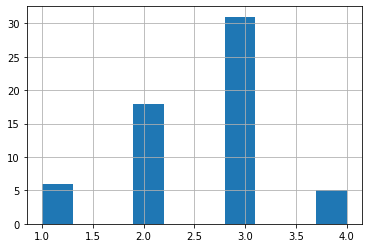

In [231]:
df['score'].hist()

In [288]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df[['GPA', 'word count', 'swe_score', 'qr_score', 'si_score', 'business_score']]
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)



In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print(acc)

0.43333333333333335


In [290]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print(acc)

0.3333333333333333


In [291]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print(acc)

0.5333333333333333


In [292]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print(acc)

0.5666666666666667


In [293]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features= None, min_samples_leaf = 5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print(acc)

0.43333333333333335


In [294]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", C = 0.23, random_state = 102)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print(acc)

0.6333333333333333
